# Credit Risk Assessment – Model Development & Tuning

**Name:** Tanbi Ghosh  
**Student ID:** iitp_aiml_2506380  
**Notebook:** 02 – Model Development & Hyperparameter Tuning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/T2_Project_Tanbi/Data/X_train.csv")
X_test  = pd.read_csv("/content/drive/MyDrive/T2_Project_Tanbi/Data/X_test.csv")

y = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
)["Risk"]


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
df = pd.read_csv(data_path)

df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,56,male,1,own,little,moderate,6745,22,car,good
1,69,female,2,free,moderate,moderate,10437,70,car,good
2,46,male,3,own,quite rich,little,9763,8,car,good
3,32,female,1,own,moderate,little,18964,70,radio/TV,bad
4,60,male,2,own,moderate,little,17650,14,domestic appliances,good


In [ ]:
X = df.drop('Risk', axis=1)
y = df['Risk']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
y_train.to_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/y_train.csv",
    index=False
)

y_test.to_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/y_test.csv",
    index=False
)

print("y_train.csv and y_test.csv saved successfully!")


y_train.csv and y_test.csv saved successfully!


In [ ]:
import pandas as pd

X_train = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/X_train.csv"
)

y_train = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/y_train.csv"
).squeeze()

X_train.shape, y_train.shape


((800, 9), (800,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
best_dt


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
import joblib

joblib.dump(
    best_dt,
    "/content/drive/MyDrive/T2_Project_Tanbi/Models/decision_tree.pkl"
)

print("Decision Tree model saved successfully!")


Decision Tree model saved successfully!


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
best_rf


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
best_rf


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
joblib.dump(
    best_rf,
    "/content/drive/MyDrive/T2_Project_Tanbi/Models/random_forest.pkl"
)

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target for XGBoost
le_xgb = LabelEncoder()
y_train_xgb = le_xgb.fit_transform(y_train)

# Check mapping
le_xgb.classes_, np.unique(y_train_xgb)


(array(['bad', 'good'], dtype=object), array([0, 1]))

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train_xgb)

best_xgb = grid_xgb.best_estimator_
best_xgb


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
import joblib

joblib.dump(
    best_xgb,
    "/content/drive/MyDrive/T2_Project_Tanbi/Models/xgboost.pkl"
)

print("XGBoost model saved successfully!")


XGBoost model saved successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/X_train.csv"
)

y_train = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/y_train.csv"
).squeeze()

X_train.shape, y_train.shape


((800, 9), (800,))

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear"]
}

grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

print("Best Logistic Regression model ready!")


Best Logistic Regression model ready!


In [ ]:
model_path = "/content/drive/MyDrive/T2_Project_Tanbi/Models"
os.makedirs(model_path, exist_ok=True)

joblib.dump(
    best_lr,
    model_path + "/logistic_regression.pkl"
)

print("Logistic Regression model saved successfully!")


Logistic Regression model saved successfully!


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

print("Best Decision Tree ready!")


Best Decision Tree ready!


In [ ]:
joblib.dump(
    best_dt,
    "/content/drive/MyDrive/T2_Project_Tanbi/Models/decision_tree.pkl"
)
print("Decision Tree saved!")


Decision Tree saved!


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best Random Forest ready!")


Best Random Forest ready!


In [ ]:
joblib.dump(
    best_rf,
    "/content/drive/MyDrive/T2_Project_Tanbi/Models/random_forest.pkl"
)
print("Random Forest saved!")


Random Forest saved!


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)


In [ ]:
xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train_xgb)
best_xgb = grid_xgb.best_estimator_

print("Best XGBoost ready!")


Best XGBoost ready!


In [ ]:
joblib.dump(
    best_xgb,
    "/content/drive/MyDrive/T2_Project_Tanbi/Models/xgboost.pkl"
)
print("XGBoost saved!")


XGBoost saved!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir("/content/drive")


['.shortcut-targets-by-id', 'MyDrive', '.Trash-0', '.Encrypted']

In [ ]:
import os
os.listdir("/content/drive/MyDrive")


['Classroom',
 'Certificates ',
 'Colab Notebooks',
 'Hack{0}lution NOC Form.pdf',
 'IMG-20250629-WA0055.jpg',
 'Passport photo Tanbi.jpg',
 'ApexPlanet  offer letter of internship .pdf',
 'CAMPUS AMBASSADOR OFFER LETTER -Tanbi Ghosh.pdf',
 'Untitled1_20250814153527 (2).png',
 'Untitled1_20250814153527 (1).png',
 'Untitled1_20250814153527.png',
 'digital art tanbi ghosh.jpg',
 'Independence.gdoc',
 'Tiho Annoprasan.xlsx.gsheet',
 'FB_IMG_1757564478456.jpg',
 'Tanbi Ghosh 1.jpg',
 'Tanbi Ghosh 2.jpg',
 'Tanbi Ghosh 3.jpg',
 'Tanbi Ghosh  4.jpg',
 'Tanbi Ghosh 5 .jpg',
 'Tanbi_Ghosh_3rd.jpg',
 'Tanbi writing 1.pdf',
 'Untitled spreadsheet.gsheet',
 'লেখার শৈলী এবং ধ্রুপদী ভাষার স্বীকৃতি.docx',
 'Tanbi.jpg',
 'Tanbi85 (1).jpg',
 'Tanbi85.jpg',
 'Copy of project dataset.ipynb',
 'Real-Time Indian Sign Language Detection and Instant Text Translation System report D14.pdf',
 'Real-Time Indian Sign Language Detection and Instant Text Translation System poster D14.pdf',
 'industrial copy_Data 

In [ ]:
import os
os.listdir("/content/drive/MyDrive/T2_Project_Tanbi")


['Notebooks', 'Data', 'Models', 'Visualizations', 'Report']

In [ ]:
os.listdir("/content/drive/MyDrive/T2_Project_Tanbi/Data")


['german_credit_data.csv',
 'X_train.csv',
 'X_test.csv',
 'y_train.csv',
 'y_test.csv']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

base_path = "/content/drive/MyDrive/T2_Project_Tanbi"
data_path = base_path + "/Data"

X_train = pd.read_csv(f"{data_path}/X_train.csv")
X_test  = pd.read_csv(f"{data_path}/X_test.csv")
y_train = pd.read_csv(f"{data_path}/y_train.csv").values.ravel()
y_test  = pd.read_csv(f"{data_path}/y_test.csv").values.ravel()

print("✅ Data loaded successfully")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", log_acc)


Logistic Regression Accuracy: 0.77


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_acc)


Decision Tree Accuracy: 0.83


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("✅ Random Forest model trained")


✅ Random Forest model trained


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print("CV scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


CV scores: [0.825   0.85    0.8375  0.79375 0.79375]
Mean CV score: 0.82


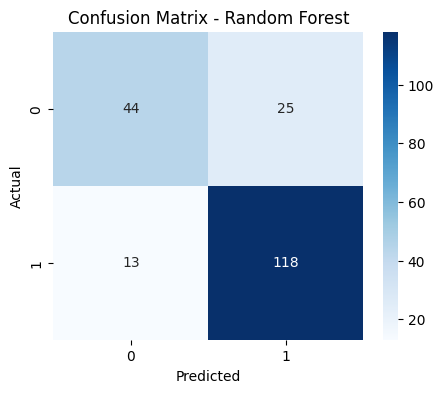

              precision    recall  f1-score   support

         bad       0.77      0.64      0.70        69
        good       0.83      0.90      0.86       131

    accuracy                           0.81       200
   macro avg       0.80      0.77      0.78       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print(classification_report(y_test, y_pred_rf))


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

print("Classes mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Classes mapping: {'bad': np.int64(0), 'good': np.int64(1)}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train_enc)

y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test_enc, y_pred_xgb)

print("XGBoost Accuracy:", xgb_acc)


XGBoost Accuracy: 0.86


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)

pipe_pred = pipe_lr.predict(X_test)
pipe_acc = accuracy_score(y_test, pipe_pred)

print("Pipeline Logistic Regression Accuracy:", pipe_acc)


Pipeline Logistic Regression Accuracy: 0.77


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best CV Score: 0.8225010090769996


In [ ]:
!pip install mlflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

base_path = "/content/drive/MyDrive/T2_Project_Tanbi"
data_path = base_path + "/Data"

X_train = pd.read_csv(f"{data_path}/X_train.csv")
X_test  = pd.read_csv(f"{data_path}/X_test.csv")
y_train = pd.read_csv(f"{data_path}/y_train.csv").values.ravel()
y_test  = pd.read_csv(f"{data_path}/y_test.csv").values.ravel()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best CV Score: 0.8225010090769996


In [ ]:
import mlflow
import mlflow.sklearn

with mlflow.start_run():
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("best_n_estimators", grid_rf.best_params_['n_estimators'])
    mlflow.log_param("best_max_depth", grid_rf.best_params_['max_depth'])
    mlflow.log_metric("best_cv_score", grid_rf.best_score_)
    mlflow.sklearn.log_model(grid_rf.best_estimator_, "rf_best_model")

print("✅ MLflow experiment logged successfully")


2026/02/18 07:38:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


✅ MLflow experiment logged successfully


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [4]:
import os

BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"

print("Data folder exists:", os.path.exists(DATA_PATH))
print("Files in Data folder:", os.listdir(DATA_PATH))


Data folder exists: True
Files in Data folder: ['german_credit_data.csv', 'X_test.csv', 'y_test.csv', 'y_train.csv', 'X_train.csv']


In [5]:
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"

X_train = pd.read_csv(f"{DATA_PATH}/X_train.csv")
X_test  = pd.read_csv(f"{DATA_PATH}/X_test.csv")
y_train = pd.read_csv(f"{DATA_PATH}/y_train.csv").squeeze()
y_test  = pd.read_csv(f"{DATA_PATH}/y_test.csv").squeeze()

print("✅ Train/Test data loaded")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


✅ Train/Test data loaded
X_train: (800, 20) X_test: (200, 20)


In [6]:
# =============================
# FEATURE GROUP DEFINITIONS
# =============================

cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

cols_for_binning = ['Duration', 'Credit_Amount', 'Age']
cols_for_scaling = [c for c in num_cols if c not in cols_for_binning]

print("WoE Binning:", cols_for_binning)
print("Standard Scaling:", cols_for_scaling)
print("Categorical:", cat_cols)


WoE Binning: ['Duration', 'Credit_Amount', 'Age']
Standard Scaling: ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
Categorical: ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']


In [7]:
!pip install optbinning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.15.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 5.26.1 which is incompatible.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 5.26.1 which is incompatib

In [8]:
from optbinning import BinningProcess
print("✅ optbinning imported successfully")


✅ optbinning imported successfully


In [9]:
print(X_train.columns.tolist())


['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18', 'Attribute19', 'Attribute20']


In [10]:
# =============================
# COLUMN RENAMING (MODEL NOTEBOOK)
# =============================

rename_mapping = {
    'Attribute1': 'Checking_Account_Status',
    'Attribute2': 'Duration',
    'Attribute3': 'Credit_History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit_Amount',
    'Attribute6': 'Savings_Account',
    'Attribute7': 'Employment_Duration',
    'Attribute8': 'Installment_Rate',
    'Attribute9': 'Personal_Status_Sex',
    'Attribute10': 'Other_Debtors',
    'Attribute11': 'Residence_Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'Other_Installment_Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing_Credits',
    'Attribute17': 'Job',
    'Attribute18': 'Num_Dependents',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign_Worker'
}

X_train = X_train.rename(columns=rename_mapping)
X_test  = X_test.rename(columns=rename_mapping)

print("✅ Columns renamed successfully in Model notebook")
print(X_train.columns.tolist())


✅ Columns renamed successfully in Model notebook
['Checking_Account_Status', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Duration', 'Installment_Rate', 'Personal_Status_Sex', 'Other_Debtors', 'Residence_Duration', 'Property', 'Age', 'Other_Installment_Plans', 'Housing', 'Existing_Credits', 'Job', 'Num_Dependents', 'Telephone', 'Foreign_Worker']


In [11]:
from optbinning import OptimalBinning

cols_for_binning = ['Duration', 'Credit_Amount', 'Age']

print("📊 Optimal Binning Analysis for Key Numerical Features\n")

for feature in cols_for_binning:
    print(f"🔍 Feature: {feature}")
    optb = OptimalBinning(
        name=feature,
        dtype="numerical",
        solver="cp",
        monotonic_trend="auto"
    )

    optb.fit(X_train[feature], y_train)
    table = optb.binning_table.build()
    display(table)


📊 Optimal Binning Analysis for Key Numerical Features

🔍 Feature: Duration


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 8.50)",74,0.09250,68,6,0.081081,1.58045,0.152401,0.017286
1,"[8.50, 11.50)",70,0.08750,56,14,0.200000,0.538997,0.022458,0.002774
2,"[11.50, 15.50)",204,0.25500,154,50,0.245098,0.277632,0.018509,0.002306
3,"[15.50, 34.50)",317,0.39625,210,107,0.337539,-0.173019,0.012256,0.001530
4,"[34.50, 47.50)",88,0.11000,50,38,0.431818,-0.572861,0.039555,0.004878
5,"[47.50, inf)",47,0.05875,22,25,0.531915,-0.975131,0.063267,0.007609
6,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,800,1.00000,560,240,0.300000,,0.308445,0.036383


🔍 Feature: Credit_Amount


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 950.50)",92,0.1150,61,31,0.336957,-0.170411,0.003449,0.000431
1,"[950.50, 1373.00)",114,0.1425,79,35,0.307018,-0.033198,0.000158,0.000020
2,"[1373.00, 3446.50)",342,0.4275,256,86,0.251462,0.243532,0.024063,0.003001
3,"[3446.50, 3913.50)",50,0.0625,46,4,0.080000,1.595049,0.104438,0.011826
4,"[3913.50, 7839.50)",146,0.1825,93,53,0.363014,-0.28499,0.015607,0.001944
5,"[7839.50, inf)",56,0.0700,25,31,0.553571,-1.062409,0.089799,0.010725
6,Special,0,0.0000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.0000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,800,1.0000,560,240,0.300000,,0.237513,0.027946


🔍 Feature: Age


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 23.50)",78,0.09750,49,29,0.371795,-0.322773,0.010759,0.001339
1,"[23.50, 25.50)",68,0.08500,37,31,0.455882,-0.670367,0.042297,0.005190
2,"[25.50, 34.50)",297,0.37125,206,91,0.306397,-0.030281,0.000342,0.000043
3,"[34.50, inf)",357,0.44625,268,89,0.249300,0.255053,0.027479,0.003426
4,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,800,1.00000,560,240,0.300000,,0.080877,0.009998


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from optbinning import BinningProcess

# Feature groups
cols_for_binning = ['Duration', 'Credit_Amount', 'Age']
cols_for_scaling = ['Installment_Rate', 'Residence_Duration', 'Existing_Credits', 'Num_Dependents']
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# Branch 1: WoE Binning
pipe_binning = Pipeline(steps=[
    ('woe', BinningProcess(variable_names=cols_for_binning)),
    ('scaler', StandardScaler())
])

# Branch 2: Other numerical
pipe_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Branch 3: Categorical
pipe_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

hybrid_preprocessor = ColumnTransformer(
    transformers=[
        ('binning', pipe_binning, cols_for_binning),
        ('num', pipe_num, cols_for_scaling),
        ('cat', pipe_cat, cat_cols)
    ],
    verbose_feature_names_out=False
)

print("✅ Hybrid preprocessor ready")


✅ Hybrid preprocessor ready


In [14]:
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(
    penalty='l2',
    C=0.1185,
    solver='saga',
    max_iter=5000,
    random_state=42
)

print("✅ Final Logistic Regression model ready")


✅ Final Logistic Regression model ready


In [15]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', hybrid_preprocessor),
    ('model', final_model)
])

print("✅ Final pipeline created")


✅ Final pipeline created


In [16]:
final_pipeline.fit(X_train, y_train)
print("✅ Final pipeline trained")


✅ Final pipeline trained


In [17]:
import joblib, os

MODEL_PATH = "/content/drive/MyDrive/T2_Project_Tanbi/Models"
os.makedirs(MODEL_PATH, exist_ok=True)

joblib.dump(
    final_pipeline,
    f"{MODEL_PATH}/final_logistic_model.pkl"
)

print("✅ Final model saved successfully")


✅ Final model saved successfully
